In [20]:
from custom_loss_functions import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import ScalarFormatter
from joblib import Parallel, delayed
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')


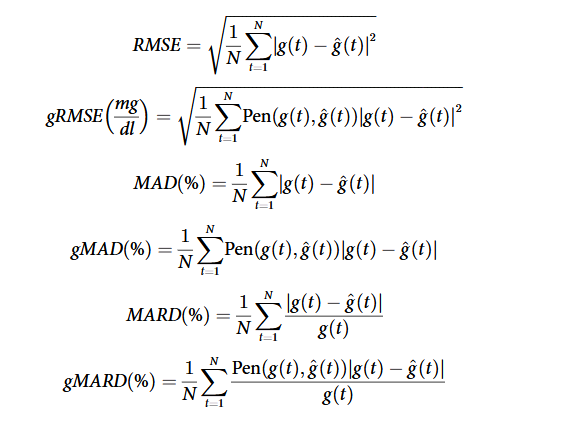

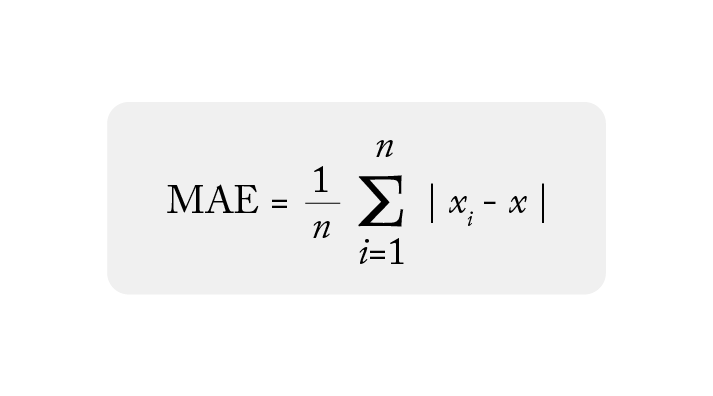

In [21]:
print(loss_function_name_list)

['RMSE', 'cSigP01', 'cSigP06', 'CP', 'gMSE', 'gMAD', 'cSigP01MSE', 'cSigP06MSE']


In [22]:

loss_function_name="cSigP01" # default loss function

loss_function=loss_functions_dic[loss_function_name]
print("INFO: loss_function = ", loss_function)
print("INFO: loss_function_name = ", loss_function_name)

INFO: loss_function =  <function c_sig_p01 at 0x0000019EED15EC10>
INFO: loss_function_name =  cSigP01


In [23]:
def evaluar_metrica(funcion, n_jobs=-1):
    # Definir rango de valores para g (verdadero) y ĝ (estimado)
    g_true = np.linspace(0, 500, 500)
    g_est = np.linspace(0, 500, 500)
    G_true, G_est = np.meshgrid(g_true, g_est)

    # Aplicar la función a cada par (g_true, g_est)
    try:
        valores = funcion(G_true, G_est)
        print("Valores vectorizados")
    except:
        pairs = np.column_stack((G_true.ravel(), G_est.ravel()))
        
        # Función auxiliar para procesar cada par
        def process_pair(pair):
            return funcion(pair[0], pair[1])
        
        # Ejecutar en paralelo
        resultados = Parallel(n_jobs=n_jobs)(
            delayed(process_pair)(pair) for pair in pairs
        )
        
        # Reformar el resultado a la forma original
        valores = np.array(resultados).reshape(G_true.shape)
    
    return valores, G_true, G_est

valores, G_true, G_est = evaluar_metrica(loss_function)


Valores vectorizados


In [24]:
print(clinical_penalty(120,120)) #==1?
print(clinical_penalty(85,120)) #==1?
print(clinical_penalty(70,120)) #==1.75?
print(clinical_penalty(55,120)) #==2.5 si g_true <55 ?
print(clinical_penalty(50,120)) #==2.5 si g_true <55 ?
print(clinical_penalty(48,48))
print(clinical_penalty(0,0)) 

tf.Tensor(1.0000036806418595, shape=(), dtype=float64)
tf.Tensor(1.016480413694987, shape=(), dtype=float64)
tf.Tensor(1.7499999999985902, shape=(), dtype=float64)
tf.Tensor(2.48351958605411, shape=(), dtype=float64)
tf.Tensor(2.496291065265048, shape=(), dtype=float64)
tf.Tensor(1.0710421690062564, shape=(), dtype=float64)
tf.Tensor(1.0711388097348942, shape=(), dtype=float64)


In [25]:
print("INFO: loss_function = ", loss_function)
print('zona A:', loss_function(25,25))
print('zona A:', loss_function(35,35))
print('zona A:', loss_function(70,70))
print('zona A:', loss_function(100,100))
print('zona A:', loss_function(150,150))
print('zona A:', loss_function(200,200))
print('zona A:', loss_function(300,300))
print('zona A:', loss_function(400,400))
print('zona A:', loss_function(500,500))
print('zonas por encima de la diagonal (1):')
print('zona B1:', loss_function(100,150))
print('zona C1:', loss_function(150,450))
print('zona D1:', loss_function(35,135))
print('zona E1:', loss_function(35,250))
print('zonas por debajo de la diagonal (2):')
print('zona B2:', loss_function(100,25))
print('zona C2:', loss_function(160,25))
print('zona D2:', loss_function(300,125))
print('zona E2:', loss_function(300,25))
print('zona E2:', loss_function(200,40))

INFO: loss_function =  <function c_sig_p01 at 0x0000019EED15EC10>
zona A: tf.Tensor(1.016501324057527, shape=(), dtype=float64)
zona A: tf.Tensor(1.0383354663804083, shape=(), dtype=float64)
zona A: tf.Tensor(1.2967410541857975, shape=(), dtype=float64)
zona A: tf.Tensor(1.2379031273197125, shape=(), dtype=float64)
zona A: tf.Tensor(1.0951194190360665, shape=(), dtype=float64)
zona A: tf.Tensor(1.0402790582957937, shape=(), dtype=float64)
zona A: tf.Tensor(1.0049742055979638, shape=(), dtype=float64)
zona A: tf.Tensor(1.0006874022406702, shape=(), dtype=float64)
zona A: tf.Tensor(1.0001074971592785, shape=(), dtype=float64)
zonas por encima de la diagonal (1):
zona B1: tf.Tensor(2.043564619642259, shape=(), dtype=float64)
zona C1: tf.Tensor(3.0006706946543815, shape=(), dtype=float64)
zona D1: tf.Tensor(3.9396470217460133, shape=(), dtype=float64)
zona E1: tf.Tensor(4.940436929185981, shape=(), dtype=float64)
zonas por debajo de la diagonal (2):
zona B2: tf.Tensor(1.9505788043813945, s

In [26]:
colors = [(0.0, (0.0, 0.8, 0.0)),      # Verde oscuro para valores bajos
        (0.2, (0.5, 1.0, 0.0)),      # Verde claro
        (0.4, (1.0, 1.0, 0.0)),      # Amarillo
        (0.6, (1.0, 0.8, 0.0)),      # Amarillo-naranja
        (0.8, (1.0, 0.4, 0.0)),      # Naranja
        (1.0, (1.0, 0.0, 0.0))]      # Rojo para valores altos


def pintar_metrica(function, loss_function_name="Metric", titulo_x="Reference Concentration (mg/dl)", titulo_y="Prediction Concentration (mg/dl)"):
    
    valores, G_true, G_est = evaluar_metrica(function) 
    
    # Definir colores para el mapa de colores
    colors1 = [(0.0, (0.5, 1.0, 0.5)),      # Verde para 1.0
            (0.25, (0.8, 1.0, 0.2)),     # Verde-amarillo para 1.25
            (0.5, (1.0, 1.0, 0.0)),      # Amarillo para 1.5
            (0.75, (1.0, 0.5, 0.0)),     # Naranja para 2.0
            (1.0, (1.0, 0.0, 0.0))]      # Rojo para 2.5
    
    colors2 = [(0.0, (0.0, 0.8, 0.0)),      # Verde oscuro para valores bajos
             (0.2, (0.5, 1.0, 0.0)),      # Verde claro
             (0.4, (1.0, 1.0, 0.0)),      # Amarillo
             (0.6, (1.0, 0.8, 0.0)),      # Amarillo-naranja
             (0.8, (1.0, 0.4, 0.0)),      # Naranja
             (1.0, (1.0, 0.0, 0.0))]      # Rojo para valores altos
    
    
    colors = colors1
    
    # ------------------------- Figura 1 -------------------------
    plt.clf()
    # Crear un mapa de colores personalizado
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
    
    # Crear la figura
    plt.plot(figsize=(8, 6))
    plt.imshow(valores, extent=[0, 500, 0, 500], origin='lower', cmap=cmap, aspect='auto')
    plt.gca().set_facecolor('white')
    cbar = plt.colorbar()
    #cbar.set_ticks([1.0, 1.5, 2.0, 2.5])
    
    # Agregar una línea diagonal blanca para referencia
    plt.plot([0, 500], [0, 500], 'w-', linewidth=1.5)
    
    # Agregar líneas de referencia para las regiones de glucosa
    plt.axvline(x=70, color='w', linestyle='-', linewidth=0.8, alpha=0.8)
    plt.axvline(x=180, color='w', linestyle='-', linewidth=0.8, alpha=0.8)
    
    # Configurar los ejes y etiquetas
    plt.xlabel(titulo_x)
    plt.ylabel(titulo_y)
    plt.title(loss_function_name)
    
    # Mostrar la figura
    plt.tight_layout()
    plt.show()
    
    # ------------------------- Figura 2 -------------------------
    plt.clf()
    cmap = LinearSegmentedColormap.from_list('custom_cmap_3d', colors)
    fig, ax1 = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8, 6))
    surf = ax1.plot_surface(G_true, G_est, valores, cmap=cmap, edgecolor='none', alpha=0.8)
    
    # Agregar barra de color
    plt.contourf(G_true, G_est, valores, zdir='z', offset=0, cmap=cmap, alpha=0.5)
    cbar = plt.colorbar()
    if loss_function_name=="cSigP06" or loss_function_name=="cSigP01":
        cbar.set_ticks(np.arange(1, 5.1, 0.5))
    
    plt.gca().set_facecolor('white')
    
    ax1.set_xlabel(titulo_x)
    ax1.set_ylabel(titulo_y)
    if loss_function_name=="cSigP06":
        ax1.set_zlabel("cSigp06")
    elif loss_function_name=="cSigP01":
        ax1.set_zlabel("cSigp01")
    plt.xticks(np.arange(0, 551, 50))
    plt.yticks(np.arange(0, 551, 50))
    ax1.set_xlim(0, 500)
    ax1.set_ylim(0, 500)  # Ajustado para que coincida con la imagen
    #ax.set_zlim(0, 4)
    ax1.view_init(elev=30, azim=-100)  # Ajustar ángulo de visualización
    
    # Configurar formato científico para el eje Z
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-1, 1))
    ax1.zaxis.set_major_formatter(formatter)
    
    plt.tight_layout()
    plt.show()
    
    # ------------------------- Figura 3 -------------------------
    plt.clf()
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
    plt.plot(figsize=(8, 6))
    plt.imshow(valores, extent=[0, 500, 0, 500], origin='lower', 
                    cmap=cmap, aspect='auto')
    
    # Agregar barra de color
    cbar = plt.colorbar()
    if loss_function_name=="cSigP06" or loss_function_name=="cSigP01":
        cbar.set_ticks(np.arange(1, 5.1, 0.5))
    plt.gca().set_facecolor('white')
    
    # Líneas de nivel gSE
    #levels = [0.5, 1.0, 1.5, 2.0, 2.5]
    #contour = ax2.contour(G_true, G_est, valores, levels, colors='black', linewidths=1.5)
    
    # Set up plot
    #plt.scatter(ref_values, pred_values, marker='o', color='black', s=8)
    print(loss_function_name + " + Clarke Error Grid")
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks(np.arange(0, 551, 50))
    plt.yticks(np.arange(0, 551, 50))
    
    # Set axes lengths
    plt.gca().set_xlim([0, 500])
    plt.gca().set_ylim([0, 500])
    plt.gca().set_aspect((500) / (500))
    
    linewidth = 1
    # Plot zone lines
    plt.plot([0, 500], [0, 500], ':', c='black', linewidth=linewidth)  #Theoretical 45 regression line
    plt.plot([0, 175 / 3], [70, 70], '-', c='black', linewidth=linewidth)
    # plt.plot([175/3, 320], [70, 500], '-', c='black', linewidth=linewidth)
    plt.plot([175 / 3, 500 / 1.2], [70, 500], '-', c='black', linewidth=linewidth)  # Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 500], '-', c='black', linewidth=linewidth)
    plt.plot([0, 70], [180, 180], '-', c='black', linewidth=linewidth)
    plt.plot([70, 390], [180, 500], '-', c='black', linewidth=linewidth) ###################
    # plt.plot([70, 70], [0, 175/3], '-', c='black', linewidth=linewidth)
    plt.plot([70, 70], [0, 56], '-', c='black', linewidth=linewidth)  # Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 500],[175/3, 320],'-', c='black', linewidth=linewidth)
    
    plt.plot([70, 500], [56, 400], '-', c='black', linewidth=linewidth)
    plt.plot([180, 180], [0, 70], '-', c='black', linewidth=linewidth)
    plt.plot([180, 500], [70, 70], '-', c='black', linewidth=linewidth)
    plt.plot([240, 240], [70, 180], '-', c='black', linewidth=linewidth)
    plt.plot([240, 500], [180, 180], '-', c='black', linewidth=linewidth)
    plt.plot([130, 180], [0, 70], '-', c='black', linewidth=linewidth)
    
    fontsize = 12
    # Add zone titles
    plt.text(380, 420, "A", fontsize=fontsize)
    plt.text(420, 380, "A", fontsize=fontsize)
    plt.text(170, 100, "B2", fontsize=fontsize)
    plt.text(100, 170, "B1", fontsize=fontsize)
    plt.text(150, 400, "C1", fontsize=fontsize)
    plt.text(150, 10, "C2", fontsize=fontsize)
    plt.text(30, 120, "D1", fontsize=fontsize)
    plt.text(370, 120, "D2", fontsize=fontsize)
    plt.text(30, 340, "E1", fontsize=fontsize)
    plt.text(370, 15, "E2", fontsize=fontsize)
    
    
    plt.tight_layout()
    plt.show()
    

Valores vectorizados


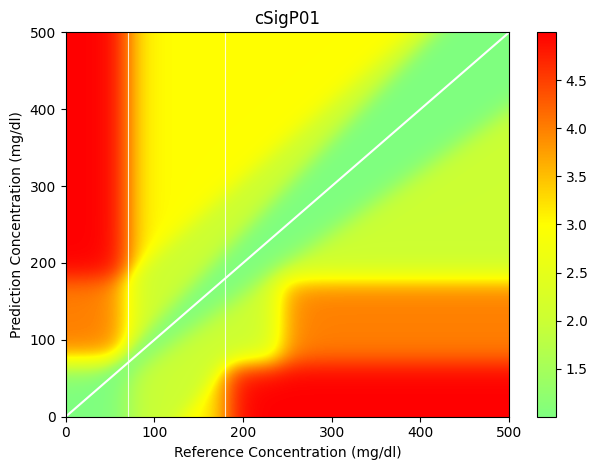

<Figure size 640x480 with 0 Axes>

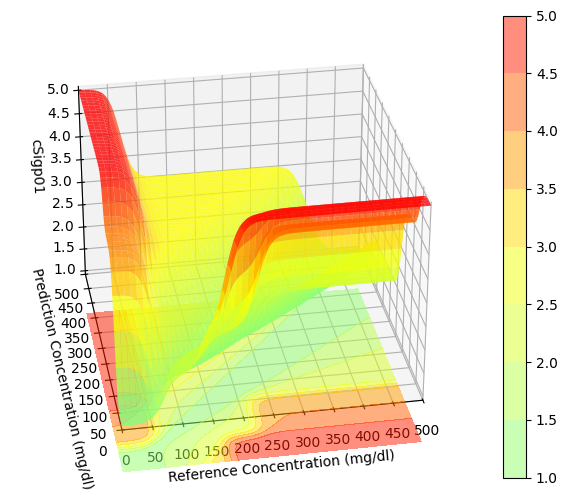

cSigP01 + Clarke Error Grid


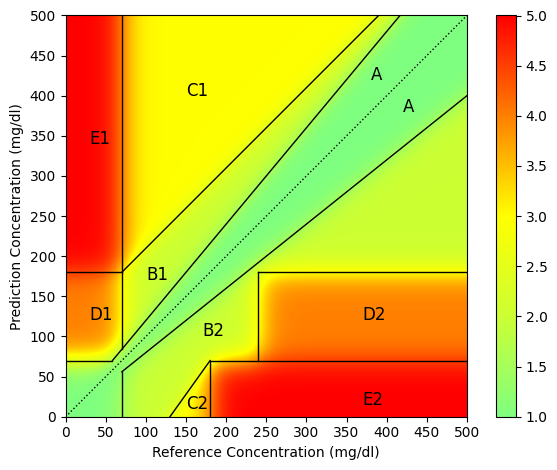

In [27]:
pintar_metrica(loss_function, loss_function_name)

In [28]:
# Create interactive widgets
loss_function_dropdown = widgets.Dropdown(
    options=loss_function_name_list,
    value='cSigP01',
    description='Loss Function:',
    disabled=False,
)

update_button = widgets.Button(
    description='Update Plot',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to update the plot',
    icon='refresh'
)

# Create output area
output = widgets.Output()

# Define update function
def update_plot(button):
    with output:
        clear_output(wait=True)
        selected_function = loss_function_dropdown.value
        print(f"INFO: Selected loss function = {selected_function}")
        print(f"INFO: loss_function = {loss_functions_dic[selected_function]}")
        
        # Calculate some sample values for display
        print("\nSample values:")
        print(f'zona A:', loss_function(25,25))
        print('zona A:', loss_function(35,35))
        print('zona A:', loss_function(70,70))
        print('zona A:', loss_function(100,100))
        print('zona A:', loss_function(150,150))
        print('zona A:', loss_function(200,200))
        print('zona A:', loss_function(300,300))
        print('zona A:', loss_function(400,400))
        print('zona A:', loss_function(500,500))
        print('zonas por encima de la diagonal (1):')
        print('zona B1:', loss_function(100,150))
        print('zona C1:', loss_function(150,450))
        print('zona D1:', loss_function(35,135))
        print('zona E1:', loss_function(35,250))
        print('zonas por debajo de la diagonal (2):')
        print('zona B2:', loss_function(100,25))
        print('zona C2:', loss_function(160,25))
        print('zona D2:', loss_function(300,125))
        print('zona E2:', loss_function(300,25))
        
        # Generate and display the plots
        pintar_metrica(loss_functions_dic[selected_function], titulo=selected_function)

# Connect the button to the update function
update_button.on_click(update_plot)

# Display the widgets and initial plot
display(loss_function_dropdown, update_button, output)

# Create initial plot
update_plot(None)

Dropdown(description='Loss Function:', index=1, options=('RMSE', 'cSigP01', 'cSigP06', 'CP', 'gMSE', 'gMAD', '…

Button(description='Update Plot', icon='refresh', style=ButtonStyle(), tooltip='Click to update the plot')

Output()

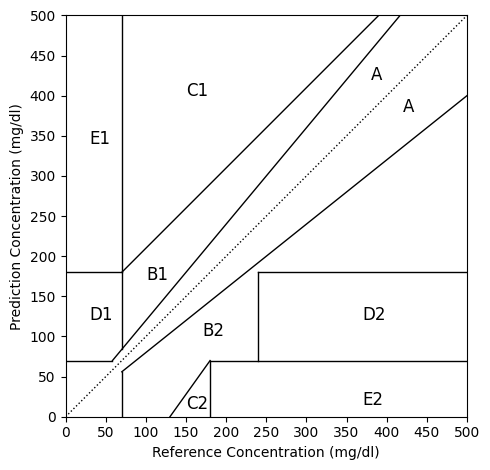

In [29]:
def CEG():
    #plt.title("Clarke Error Grid")
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks(np.arange(0, 551, 50))
    plt.yticks(np.arange(0, 551, 50))
    
    # Set axes lengths
    plt.gca().set_xlim([0, 500])
    plt.gca().set_ylim([0, 500])
    plt.gca().set_aspect((500) / (500))
    
    linewidth = 1
    # Plot zone lines
    plt.plot([0, 500], [0, 500], ':', c='black', linewidth=linewidth)  #Theoretical 45 regression line
    plt.plot([0, 175 / 3], [70, 70], '-', c='black', linewidth=linewidth)
    # plt.plot([175/3, 320], [70, 500], '-', c='black', linewidth=linewidth)
    plt.plot([175 / 3, 500 / 1.2], [70, 500], '-', c='black', linewidth=linewidth)  # Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 500], '-', c='black', linewidth=linewidth)
    plt.plot([0, 70], [180, 180], '-', c='black', linewidth=linewidth)
    plt.plot([70, 390], [180, 500], '-', c='black', linewidth=linewidth) ###################
    # plt.plot([70, 70], [0, 175/3], '-', c='black', linewidth=linewidth)
    plt.plot([70, 70], [0, 56], '-', c='black', linewidth=linewidth)  # Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 500],[175/3, 320],'-', c='black', linewidth=linewidth)
    
    plt.plot([70, 500], [56, 400], '-', c='black', linewidth=linewidth)
    plt.plot([180, 180], [0, 70], '-', c='black', linewidth=linewidth)
    plt.plot([180, 500], [70, 70], '-', c='black', linewidth=linewidth)
    plt.plot([240, 240], [70, 180], '-', c='black', linewidth=linewidth)
    plt.plot([240, 500], [180, 180], '-', c='black', linewidth=linewidth)
    plt.plot([130, 180], [0, 70], '-', c='black', linewidth=linewidth)
    
    fontsize = 12
    # Add zone titles
    plt.text(380, 420, "A", fontsize=fontsize)
    plt.text(420, 380, "A", fontsize=fontsize)
    plt.text(170, 100, "B2", fontsize=fontsize)
    plt.text(100, 170, "B1", fontsize=fontsize)
    plt.text(150, 400, "C1", fontsize=fontsize)
    plt.text(150, 10, "C2", fontsize=fontsize)
    plt.text(30, 120, "D1", fontsize=fontsize)
    plt.text(370, 120, "D2", fontsize=fontsize)
    plt.text(30, 340, "E1", fontsize=fontsize)
    plt.text(370, 15, "E2", fontsize=fontsize)
    
    plt.tight_layout()
    plt.show()
CEG()